In [120]:
import pandas as pd
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
# which method was best per precinct
voters = pd.read_csv("cleaned_nov_votes.csv")
text_outreach = pd.read_csv("contact methods/TextBanking_Efforts.xlsx - Attempts.csv")
walk_outreach = pd.read_csv("contact methods/total_walk.csv")

# list of voters contacted through phone
phone_outreach = pd.read_csv("contact methods/phone_contacts.csv")
phone_contacts = phone_outreach[phone_outreach["Contact Outcome"] == "Talking to Correct Person"]
phone_contacts.drop_duplicates()
phone_contacts.dropna()
phone_ids = phone_contacts["Voter ID"].values.tolist()

# list of voters contacted through text
text_contacts = pd.read_csv("contact methods/success_text_data.csv")
text_ids = text_contacts["Voter ID"].values.tolist()

# list of voters contacted through walks
walk_contacts = pd.read_csv("contact methods/canvassed_walk.csv")
walk_ids = walk_contacts["VoterID"].values.tolist()


In [122]:
text_voters = voters[voters["Voter ID"].isin(text_ids)]
phone_voter_id = voters["Voter ID"].values.tolist()

phone_contacted_ids = []
for elem in phone_ids:
    if str(elem).isdigit():
        phone_contacted_ids.append(int(elem))

phone_voters = voters[voters["Voter ID"].isin(phone_contacted_ids)]
walk_voters = voters[voters["Voter ID"].isin(walk_ids)]
text_contact_conversion = text_voters.shape[0]/len(text_ids)
text_overall_conversion = text_voters.shape[0]/text_outreach.shape[0]

phone_contact_conversion = phone_voters.shape[0]/len(phone_contacted_ids)
phone_overall_conversion = phone_voters.shape[0]/phone_outreach.shape[0]

walk_contact_conversion = walk_voters.shape[0]/len(walk_ids)
walk_overall_conversion = walk_voters.shape[0]/walk_outreach.shape[0]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


<AxesSubplot:title={'center':'Targeted Voter Turnout vs Age'}, xlabel='age'>

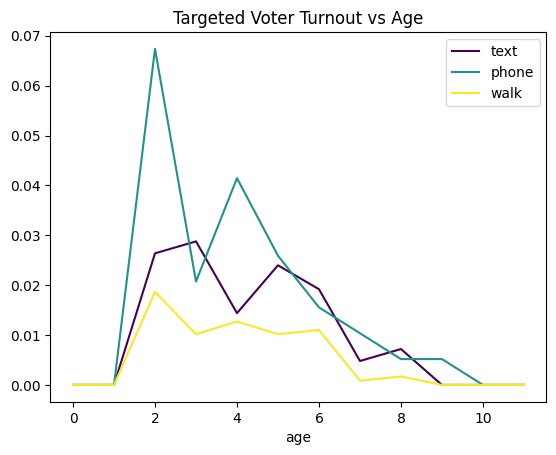

In [123]:
# best method per age:
# dict needs to be of form { age: [0, 1, 2], text: [4, 5, 6], door:[4, 5, 6], phone:}

ages = list(range(0, 12))
print(ages)
age_text = [0]*12
age_phone = [0]*12
age_walk = [0]*12
# update all the ages of text based voters
for idx, row in text_voters.iterrows():
    age = (2022 - row.loc["BIRTHYEAR"])//10
    age_text[age] += 1

for idx, row in phone_voters.iterrows():
    age = (2022 - row.loc["BIRTHYEAR"])//10
    age_phone[age] += 1

for idx, row in walk_voters.iterrows():
    age = (2022 - row.loc["BIRTHYEAR"])//10
    age_walk[age] += 1

# Normalization might need some changes
# for an overall, add all the indices, add all the stuff to divide by, bam pow (prob in diff graph)
for i in range(12):
    age_phone[i] /= len(phone_contacted_ids)
    age_text[i] /= len(text_ids)
    age_walk[i] /= len(walk_ids)

age_dict = {"age": ages, "text": age_text, "phone": age_phone, "walk": age_walk}
age_data = pd.DataFrame(age_dict)
age_data.plot(x="age", colormap = "viridis", title = "Targeted Voter Turnout vs Age")


In [124]:
# best method by precinct
precinct_lst = [9, 10, 11, 44, 46, 285, 347, 379, 411, 430, 431, 664, 752, 792, 793]
precinct_lst.sort()

# x axis is a sorted list of the precincts that we hit
# y axis is different colors for turnout for all ages based on whatever methods
# dict looks like {precinctlst = [1, 2, 3], text_voters per precinct}
precinct_text = [0]*len(precinct_lst)
precinct_phone = [0]*len(precinct_lst)
precinct_walk = [0]*len(precinct_lst)
for idx, row in text_voters.iterrows():
    voter_precinct = row.loc["Voting Precinct"]
    if voter_precinct in precinct_lst:
        precinct_text[precinct_lst.index(voter_precinct)] += 1
for idx, row in phone_voters.iterrows():
    voter_precinct = row.loc["Voting Precinct"]
    if voter_precinct in precinct_lst:
        precinct_phone[precinct_lst.index(voter_precinct)] += 1
for idx, row in walk_voters.iterrows():
    voter_precinct = row.loc["Voting Precinct"]
    if voter_precinct in precinct_lst:
        precinct_walk[precinct_lst.index(voter_precinct)] += 1




df_clean_all_registered = pd.read_csv("clean_all_registered.csv")
int_precinct_lst = []
for i in precinct_lst:
    int_precinct_lst.append(int(i))
reg_in_precincts = df_clean_all_registered[df_clean_all_registered["Precinct"].isin(int_precinct_lst)]

reg_by_precinct = [0]*15
for idx, row in reg_in_precincts.iterrows():
    precinct = row.loc["Precinct"]
    voterid = row.loc["Voter ID"]
    reg_by_precinct[int_precinct_lst.index(precinct)] += 1
print(reg_by_precinct)

[2447, 1864, 1786, 2147, 2601, 2764, 3773, 2056, 2538, 1561, 3911, 3004, 1536, 2003, 2687]


In [125]:
df_clean_all_registered = pd.read_csv("clean_all_registered.csv")
int_precinct_lst = []
for i in precinct_lst:
    int_precinct_lst.append(int(i))
reg_in_precincts = df_clean_all_registered[df_clean_all_registered["Precinct"].isin(int_precinct_lst)]
text_attempt_id = ['1041564212', '1043427395', '1061260847', '1090798474', '1102265724', '1102280756', '1102288308', '1102288536', '1102298111', '1102311807', '1102319268', '1102321583', '1102334131', '1102344612', '1102360166', '1102365946', '1102381918', '1102620312', '1102720198', '1102751899', '1102752620', '1102816366', '1103032468', '1103045569', '1103049503', '1103057439', '1103069179', '1103073300', '1103089342', '1103127098', '1103138424', '1103153910', '1103154991', '1103184488', '1103201280', '1103258780', '1103577879', '1103719255', '1103942287', '1104208603', '1104248838', '1105733695', '1105752187', '1106105154', '1106126760', '1106633023', '1107270162', '1107676492', '1108045610', '1108782112', '1108798354', '1108806210', '1108812362', '1108858411', '1108858843', '1108866721', '1108882899', '1109169518', '1109243921', '1109255465', '1110122288', '1110198951', '1110263301', '1110277717', '1110286460', '1110411952', '1110611620', '1110643497', '1110651623', '1110652562', '1110661687', '1110692399', '1111151694', '1111158835', '1111191615', '1111191881', '1111231838', '1111255278', '1111255975', '1111618703', '1111808332', '1111867431', '1111875457', '1111908026', '1111908536', '1111917349', '1111925709', '1112319408', '1112335062', '1112344251', '1112360223', '1112367208', '1112405725', '1112409138', '1112440204', '1112447565', '1113618459', '1114347291', '1114456561', '1115348020', '1116682880', '1116752541', '1117512992', '1119034836', '1119042735', '1119135839', '1119171499', '1119178625', '1119196179', '1119196450', '1119203572', '1119203720', '1119204682', '1119212312', '1119221376', '1119228792', '1119246041', '1119261824', '1119270440', '1120726932', '1120760568', '1121548492', '1139406086', '1141587149', '1141625239', '1143689024', '1144441025', '1144604993', '1146383861', '1146975175', '1147395094', '1148131140', '1148208389', '1150168717', '1150208587', '1152945860', '1153469261', '1153898979', '1154460658', '1155432468', '1155812895', '1161169183', '1161348367', '1161412283', '1161501775', '1162148270', '1165085303', '1165291223', '1165576025', '1165908532', '1166780672', '1166972720', '1168952924', '1170768035', '1170995500', '1171605085', '1171719970', '1172193629', '1173592928', '1174165311', '1174343263', '1178785322', '1178861174', '1179530270', '1180202548', '1180830706', '1180944303', '1182258260', '1182742261', '1184967878', '1185767924', '1185864040', '1186407421', '1190947639', '1191750415', '1191751143', '1191763736', '1192974121', '1193844815', '1194319002', '1194643862', '1195738882', '1197920010', '1198113685', '1198738881', '1198810419', '1199050727', '1199159941', '1199403770', '1199871982', '1200487540', '1201571112', '1202267390', '1202694895', '1202793966', '1202853695', '1203158450', '1203400517', '1203537020', '1203986932', '1204283030', '1204663731', '1204715957', '1205765177', '1206397977', '1206764191', '1207207117', '1208260799', '1209132777', '1209727599', '1211833266', '1211848700', '1211986401', '1212405184', '1212626025', '1213440415', '1213614231', '1213880708', '1215627954', '1215905465', '1215959963', '1216330175', '1217401649', '1218141326', '1218577067', '1218915157', '1219036818', '1219219737', '1219443894', '1219762392', '1219808733', '1221129800', '2000958971', '2001172788', '2001223992', '2001517398', '2001754649', '2001837800', '2001841219', '2001847389', '2002175359', '2002798857', '2003071645', '2120401652', '2120598774', '2120800245', '2120801813', '2120974530', '2121376034', '2121986057', '2122292797', '2123590810', '2123888864', '2124067974', '2124361041', '2124474180', '2125071671', '2125235479', '2125750267', '2126045152', '2126486961', '2127199855', '2127338973', '2127416288', '2127690180', '2128428129', '2128652897', '2129093618', '2129640847', '2129784328', '2130591985', '2131031342', '2131950131', '2132768912', '2132769271', '2133921550', '2134155854', '2134220242', '2134295256', '2134300790', '2135421529', '2135517680', '2135987729', '2136456260', '2136520888', '2136828547', '2137340175', '2137839489', '2137849233', '2137960816', '2138313939', '2139834299', '2141428519', '2141580130', '2142760737', '2142823775', '2142826236', '2142826431', '2142826844', '2143328607', '2143516585', '2144166624', '2144382222', '2144591279', '2144885988', '2144886134', '2145147379', '2145890750', '2145999724', '2147097720', '2147097909', '2147157806', '2147856514', '2148237430', '2148807335', '2148862425', '2149455358', '2151274650', '2152579211', '2153867488', '2153967188', '2154751218', '2156135067', '2156159044', '2156536367', '2156642512', '2156760673', '2157246237', '2158213781', '2159200426', '2159450097', '2159537610', '2159634239', '2159827993', '2159944904', '2160115952', '2160116587', '2160740712', '2160909174', '2161374110', '2161674570', '2161753482', '2161853526', '2162840308', '2163935663', '2164259200', '2164272012', '2164339329', '2164483443', '2164685932', '2164686043', '2165258760', '2166127963', '2168552480', '2168555917', '2169368741', '2169855630', '2170447899', '2172452515', '2173951744', '2173966653', '2174314541', '2174747904', '2175663638', '2175743823', '2175932661', '2175950837', '2176204793', '2176309561', '2176486300', '2176521321', '2177336319', '2177338793', '2177616562', '2177942933', '2178429858', '2178529666', '2178650679', '2178815602', '2179192264', '2179356118', '2179361930', '2179460491', '2179587769', '2179784020', '2180332978', '2180450496', '2183834737', '2184005065', '2184040842', '2184244286', '2184343544', '2184567301', '2184738511', '2185306361', '2185423267', '2185544720', '2185547466', '2185581064', '2185681343', '2185681452', '2185766468', '2185766508', '2186281584', '2186290710', '2186425136', '2186508278', '2186509165', '2186670142', '2187101020', '2187267253', '2187323984', '2187464508', '2188489848', '2188895084', '2190963915', '2192097772']
reg_by_precinct_text = [0]*15
for idx, row in reg_in_precincts.iterrows():
    precinct = row.loc["Precinct"]
    voterid = str(row.loc["Voter ID"])
    if voterid in text_attempt_id:
        reg_by_precinct_text[int_precinct_lst.index(precinct)] += 1
print(reg_by_precinct_text)

[24, 18, 15, 22, 16, 22, 17, 29, 32, 14, 41, 35, 5, 8, 24]


In [126]:
# find the denominator

reg_by_precinct_phone = [0]*15
for idx, row in reg_in_precincts.iterrows():
    precinct = row.loc["Precinct"]
    voterid = row.loc["Voter ID"]
    if voterid in phone_contacted_ids:
        reg_by_precinct_phone[int_precinct_lst.index(precinct)] += 1
print(reg_by_precinct_phone)

[1, 1, 3, 2, 3, 2, 2, 4, 3, 3, 7, 9, 1, 2, 2]


In [127]:
reg_by_precinct_walk = [0]*15
for idx, row in reg_in_precincts.iterrows():
    precinct = row.loc["Precinct"]
    voterid = row.loc["Voter ID"]
    if voterid in walk_ids:
        reg_by_precinct_walk[int_precinct_lst.index(precinct)] += 1
print(reg_by_precinct_walk)

[17, 69, 55, 20, 35, 112, 89, 89, 131, 39, 144, 136, 13, 61, 42]


  precincts      text     phone      walk
0         9  0.166667  0.000000  0.176471
1        10  0.000000  0.000000  0.072464
2        11  0.066667  0.333333  0.036364
3        44  0.090909  0.000000  0.150000
4        46  0.000000  0.666667  0.085714
[0.16666666666666666, 0.0, 0.06666666666666667, 0.09090909090909091, 0.0, 0.045454545454545456, 0.23529411764705882, 0.0, 0.09375, 0.0, 0.04878048780487805, 0.08571428571428572, 0.2, 0.0, 0.041666666666666664]


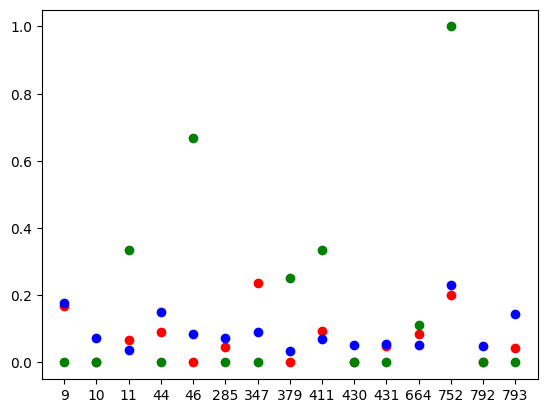

In [128]:
# find the denominator
for i in range(len(precinct_lst)):
    precinct_phone[i] /= reg_by_precinct_phone[i]
    precinct_text[i] /= reg_by_precinct_text[i]
    precinct_walk[i] /= reg_by_precinct_walk[i]
    precinct_lst[i] = str(precinct_lst[i])

precinct_dict = {"precincts": precinct_lst, "text": precinct_text, "phone": precinct_phone, "walk": precinct_walk}
precinct_data = pd.DataFrame(precinct_dict)
print(precinct_data.head())
print(precinct_text)

plt.scatter(precinct_lst, precinct_text, c="red", label="text")
plt.scatter(precinct_lst, precinct_phone, c="green", label="phone")
plt.scatter(precinct_lst, precinct_walk, c="blue", label="walk")
plt.show()
# precinct_data.plot(kind = "scatter", x="precincts", y = "text", color = "red")
# precinct_data.plot(kind = "scatter", x="precincts", y = "phone", color = "green")
# precinct_data.plot(kind = "scatter", x="precincts", y = "walk", color = "blue")